Application examples:
- Neuroscience (https://www.nature.com/articles/s41586-021-04268-7)
- Financial crash (https://www.sciencedirect.com/science/article/abs/pii/S0378437117309202)
- Cancer threatment (https://link.springer.com/article/10.1186/s13062-015-0058-5)

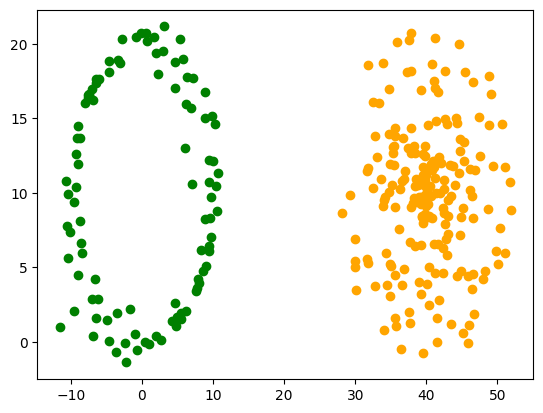

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def generate_circle_data(n: int, r: float, x0: float, y0: float) -> tuple[np.ndarray, np.ndarray]:
    # Generate random noise
    n = 100
    noise = np.random.normal(0, 1, n)

    # Generate angles
    theta = np.linspace(0, 2*np.pi, n)

    return  x0 + r*np.cos(theta) + noise, y0 + r*np.sin(theta) + noise

def generate_disk_data(n: int, r: float, x0: float, y0: float) -> tuple[np.ndarray, np.ndarray]:
    # Generate radiuses and angles
    radius = np.random.uniform(0, r, n)
    theta = np.linspace(0, 2*np.pi, n)
    return x0 + radius*np.cos(theta), y0 + radius*np.sin(theta)


circle_xs, circle_ys = generate_circle_data(100, 10, 0, 10)
disk_xs, disk_ys = generate_disk_data(200, 12, 40, 10)


# Plot the data
plt.scatter(circle_xs, circle_ys, color="green")
plt.scatter(disk_xs, disk_ys, color="orange")


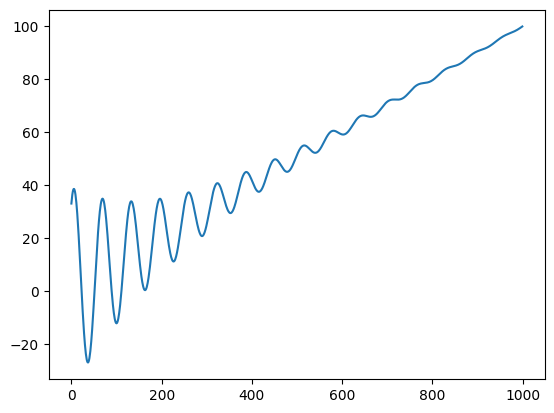

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def time_delay_embedding(time_series: np.ndarray, delay: int) -> tuple[np.ndarray, np.ndarray]:
    return time_series[:len(time_series) - delay], time_series[delay:]


def get_time_series_with_oscillation_and_decay():
    t = np.linspace(1, 100, 1000)
    decay = np.exp(-t/20)
    oscillation = 40 * np.sin(t) * decay
    return np.linspace(1, 100, 1000) + oscillation


time_series = get_time_series_with_oscillation_and_decay()

plt.plot(time_series)
plt.show()


In [10]:

import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

def interactive_time_delay_embedding(start: int = 0, size: int = 100):
    embedding = time_delay_embedding(time_series[start:start + size], 3)
    plt.scatter(embedding[0], embedding[1])
    plt.show()

w = interactive(
    interactive_time_delay_embedding,
    start=(0, 900),
    size=fixed(100)
)

w



interactive(children=(IntSlider(value=0, description='start', max=900), Output()), _dom_classes=('widget-inter…